In [23]:
import os
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from CNNModel import CNNModel

In [24]:
# Load CIFAR10 training and testing datasets from Karas
_, (x_test,y_test) = datasets.cifar10.load_data()

# Normalize Pixel values to be between 0 & 1
x_test = x_test/255

img = np.array(x_test[1020])
img_label = y_test[1020]
print(img_label)

images_list = []
images_list.append(np.array(img))
x = np.asarray(images_list)

[1]


In [25]:
m_id = 5 # Model id
model_dir = os.path.abspath('Models/') + f'/{m_id}/final_weights.hdf5'

In [26]:
model = CNNModel(id=m_id)()
model.load_weights(model_dir)

In [27]:
prediction = model.predict(x)

print("Predicted class is:",prediction)


Predicted class is: [[0.02294722 0.00357583 0.17334549 0.14686392 0.43850744 0.04148771
  0.11801719 0.02969954 0.01624816 0.00930747]]


In [28]:
print(len(model.layers))

11


In [29]:
from tensorflow.keras.models import Model

print(len(model.layers))
layer_outputs = [layer.output for layer in model.layers[:8]] # Extracts the outputs of the top 12 layers
activation_model = Model(inputs=model.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input

11


In [30]:
activations = activation_model.predict(x) # Returns a list of five Numpy arrays: one array per layer activation

In [31]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 30, 30, 32)


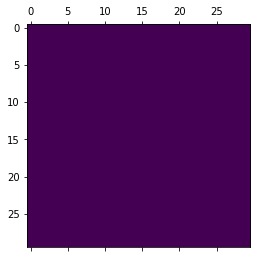

In [32]:
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

C:\Users\tarek\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


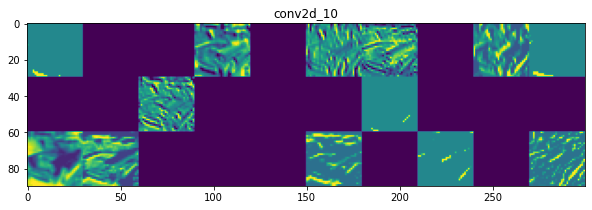

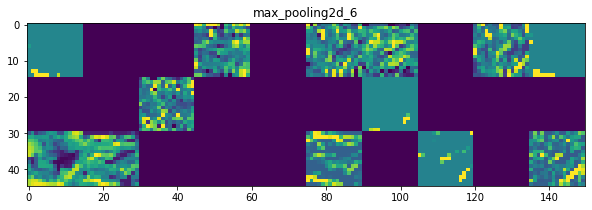

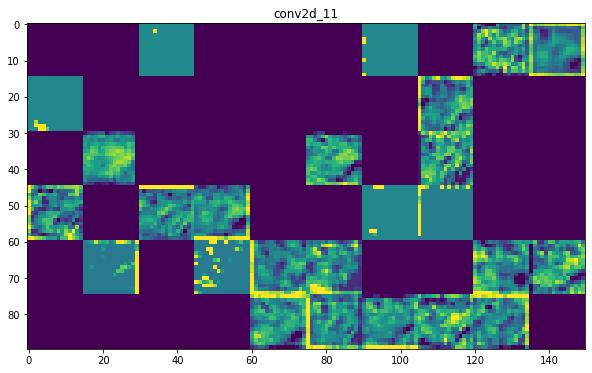

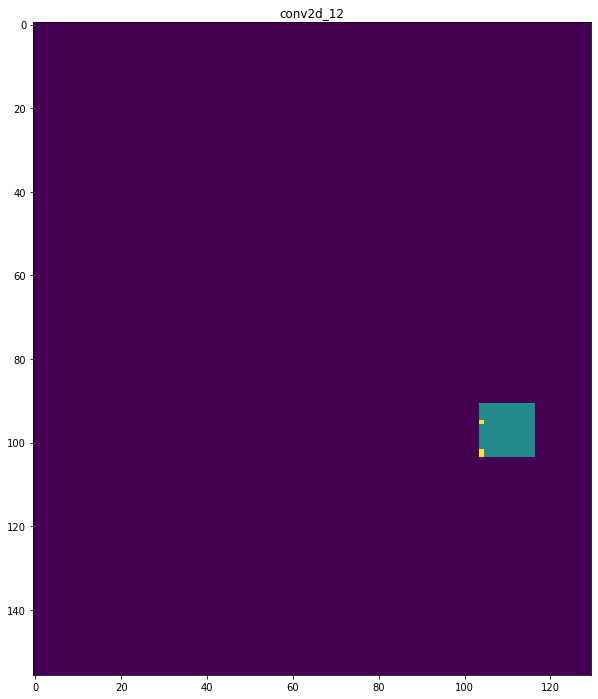

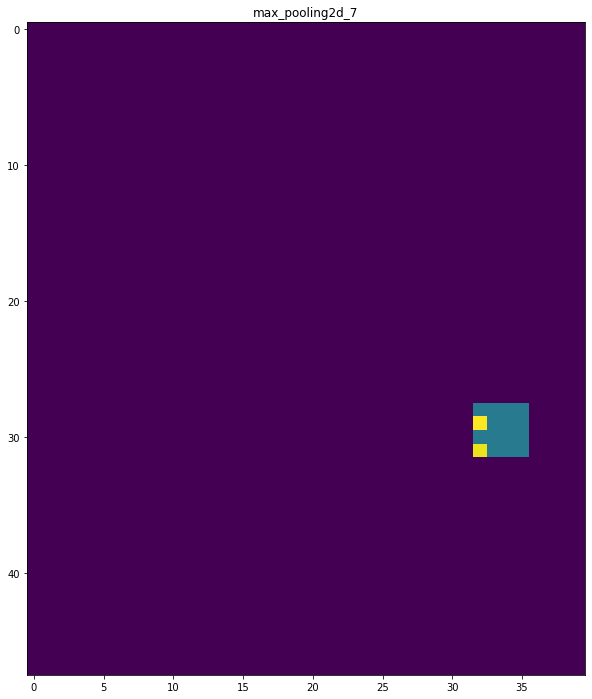

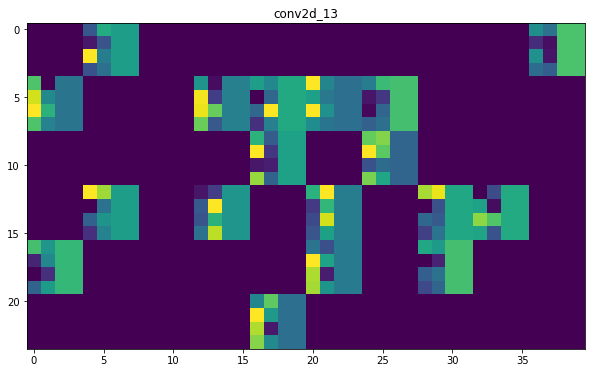

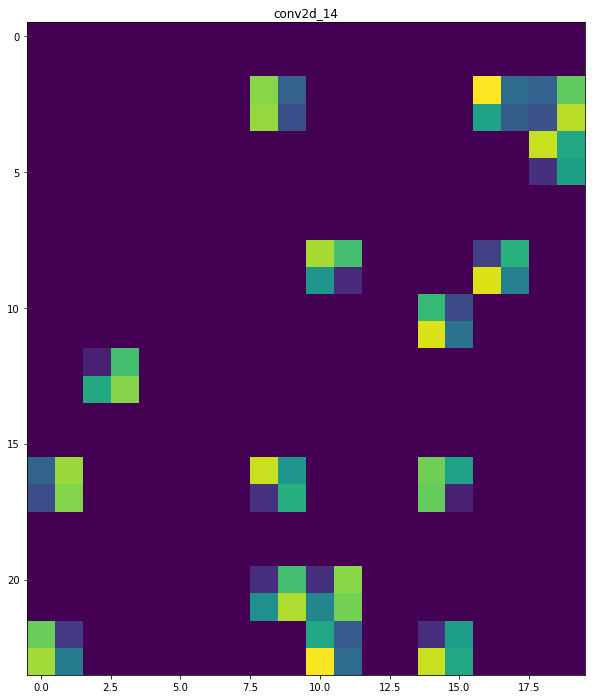

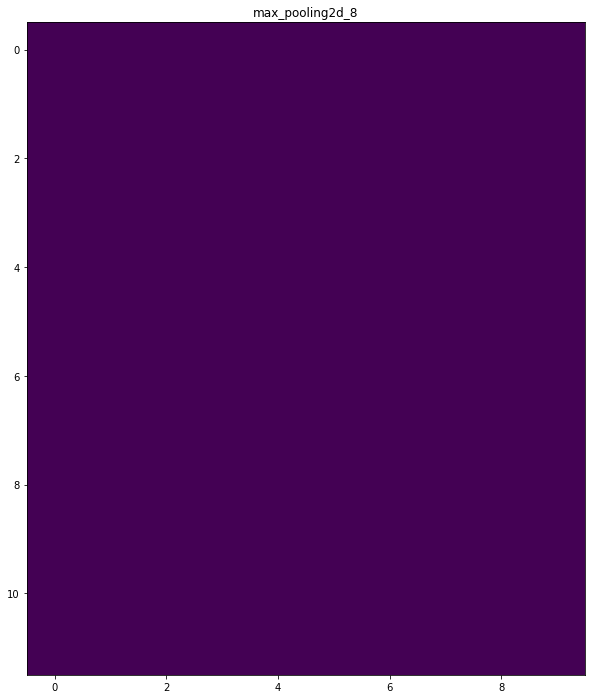

In [33]:
layer_names = []
for layer in model.layers[:10]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 10

for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            if len(layer_activation.shape) == 4:
                channel_image = layer_activation[0,
                                                :, :,
                                                col * images_per_row + row]

                channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size, # Displays the grid
                            row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')